In [46]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""Pharmahacks - Phyla Challenge #2"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('challenge_1_gut_microbiome_data.csv', index_col=0)
print(df.head(5))

          Bacteria-1  Bacteria-2  Bacteria-3  Bacteria-4  Bacteria-5  \
Sample-1         0.0         0.0         0.0         0.0         0.0   
Sample-2         0.0         0.0         0.0         0.0         0.0   
Sample-3         0.0        10.0         0.0         0.0         0.0   
Sample-4         0.0        17.0         0.0         0.0         0.0   
Sample-5         0.0         8.0         0.0         0.0         0.0   

          Bacteria-6  Bacteria-7  Bacteria-8  Bacteria-9  Bacteria-10  ...  \
Sample-1         0.0         0.0         0.0         0.0          0.0  ...   
Sample-2         0.0         0.0         0.0         0.0          0.0  ...   
Sample-3         0.0         0.0         0.0         0.0          0.0  ...   
Sample-4         0.0         0.0         0.0         0.0          0.0  ...   
Sample-5         0.0         0.0         0.0         0.0          0.0  ...   

          Bacteria-1086  Bacteria-1087  Bacteria-1088  Bacteria-1089  \
Sample-1            0.0   

In [48]:
X = df.filter(regex=("Bacteria-*"))
Y = df['disease']

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0)

In [161]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

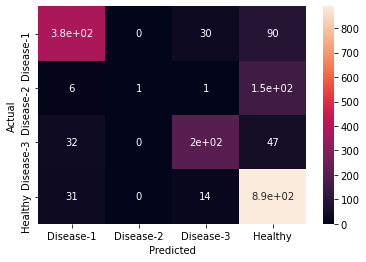

In [162]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=[
                               'Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [9]:
print('F1 Score - Micro: ', metrics.accuracy_score(Y_test, Y_pred))
print('F1 Score - Macro: ', metrics.f1_score(Y_test, Y_pred, average='macro'))
print('F1 Score - Weighted: ', metrics.f1_score(Y_test, Y_pred, average='weighted'))

F1 Score - Micro:  0.7888829502939605
F1 Score - Macro:  0.6092643971812871
F1 Score - Weighted:  0.7535328039740695


In [ ]:
#print('F1 Score - Micro: ', metrics.cohen_kappa_score(Y_test, Y_pred))

In [11]:
# Actual disease
print(Y_test)
# Prediction
print(Y_pred)
Y_proba = clf.predict_proba(X_test)
# Probability
print(Y_proba)

Sample-5024      Healthy
Sample-2976    Disease-3
Sample-40      Disease-2
Sample-3862      Healthy
Sample-4761      Healthy
                 ...    
Sample-4758      Healthy
Sample-416     Disease-2
Sample-4175      Healthy
Sample-5207      Healthy
Sample-1594    Disease-1
Name: disease, Length: 1871, dtype: object
['Healthy' 'Disease-3' 'Healthy' ... 'Healthy' 'Healthy' 'Disease-1']
[[0.07 0.08 0.11 0.74]
 [0.23 0.03 0.62 0.12]
 [0.02 0.15 0.08 0.75]
 ...
 [0.1  0.21 0.06 0.63]
 [0.09 0.23 0.12 0.56]
 [0.98 0.   0.01 0.01]]


In [26]:
# Sample 3602 - Disease-1
sample = X.loc[["Sample-3602"]]
sample_predict = clf.predict(sample)
print(sample_predict)

['Disease-1']


In [58]:
df2 = df.loc[(df['disease'] == 'Disease-2') | (df['disease'] == 'Healthy')]
X2 = df2.filter(regex=("Bacteria-*"))
Y2 = df2['disease']

4729305


In [163]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(
    X2, Y2, test_size=0.25, random_state=0)

In [164]:
clf2 = RandomForestClassifier(n_estimators=1000)
clf2.fit(X2_train, Y2_train)
Y2_pred = clf.predict(X2_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

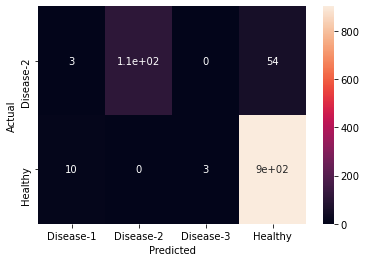

In [165]:
confusion_matrix2 = pd.crosstab(Y2_test, Y2_pred, rownames=[
                               'Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix2, annot=True)

In [166]:
# Replace values of first table with values 2nd table
print(Y2_test)

Sample-4981      Healthy
Sample-5789      Healthy
Sample-6706      Healthy
Sample-902     Disease-2
Sample-6632      Healthy
                 ...    
Sample-6923      Healthy
Sample-5204      Healthy
Sample-653     Disease-2
Sample-7179      Healthy
Sample-5947      Healthy
Name: disease, Length: 1080, dtype: object


In [167]:
Y2df = pd.DataFrame(Y2_pred)
Y2df.index = Y2_test.index.values
Y2df = Y2df.rename(columns = {0:"disease"})

In [168]:
print(Y2df)

               disease
Sample-4981    Healthy
Sample-5789    Healthy
Sample-6706    Healthy
Sample-902   Disease-2
Sample-6632    Healthy
...                ...
Sample-6923    Healthy
Sample-5204    Healthy
Sample-653   Disease-2
Sample-7179    Healthy
Sample-5947    Healthy

[1080 rows x 1 columns]


In [191]:
Ydf = pd.DataFrame(Y_pred)
Ydf.index = Y_test.index.values
Ydf = Ydf.rename(columns = {0:"disease"})
#print(Ydf.loc["Sample-5024"])

disease    Healthy
Name: Sample-5024, dtype: object


In [186]:
print(Y2df.loc[(Y2df['disease'] == 'Disease-2')])
#print(Ydf.loc["Sample-902"])

              disease
Sample-902  Disease-2
Sample-436  Disease-2
Sample-888  Disease-2
Sample-222  Disease-2
Sample-900  Disease-2
...               ...
Sample-268  Disease-2
Sample-907  Disease-2
Sample-193  Disease-2
Sample-230  Disease-2
Sample-653  Disease-2

[108 rows x 1 columns]


In [194]:
combined_df = Y2df.append(Ydf, ignore_index=False)
#print(bigdata.loc[(bigdata['disease'] == 'Disease-2')])
#print(bigdata.size)
#combined_df['disease'].tolist()
print(Y_test.size)
print(combined_df.size)
#print(combined_df.loc["Sample-674"])
#print(Y_test.loc["Sample-3167"])
print(Y_pred.size)
print(combined_df.loc["Sample-5024"])

1871
2951
1871
disease    Healthy
Name: Sample-5024, dtype: object


In [142]:
confusion_matrix = pd.crosstab(Y_test, combined_df['disease'].tolist(), rownames=[
                               'Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

AssertionError: arrays and names must have the same length